Text(0, 0.5, 'a / (m/s/s)')

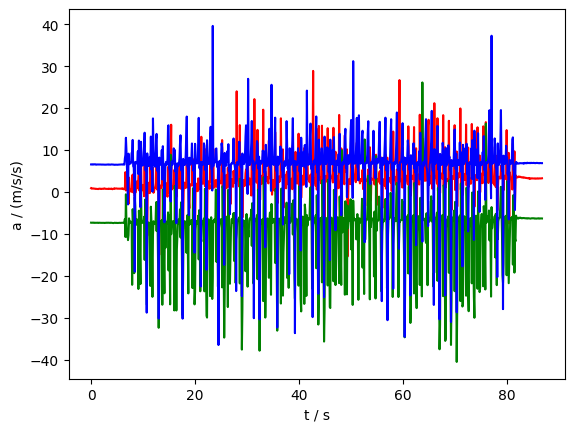

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# sf = 0.1
# timestamp = np.linspace(0, 100, num=1000)
# timestamp = [round(element,1) for element in timestamp]
# print(timestamp)

millis = []
x_acceleration = []
y_acceleration = []
z_acceleration = []

f = open("./../Measurements/100m_01.txt","r")

# Convert from raw data into m/(s^2)
for line in f:
    line = line.split()
    millis.append(int(line[1]))
    x_acceleration.append(int(line[3])/4096*9.81)
    y_acceleration.append(int(line[5])/4096*9.81)
    z_acceleration.append(int(line[7])/4096*9.81)

f.close()

start_millis = millis[0]
s_normalized = [(x - start_millis)/1000 for x in millis]

# Pack into DataFrame 
#d = {'X': x_acceleration, 'Y': y_acceleration, 'Z': z_acceleration}
#df = pd.DataFrame(data=d)
#print(df)

plt.plot(s_normalized, x_acceleration,'r')
plt.plot(s_normalized, y_acceleration,'g')
plt.plot(s_normalized, z_acceleration,'b')
plt.xlabel("t / s")
plt.ylabel("a / (m/s/s)")

Text(0.5, 0, 't / s')

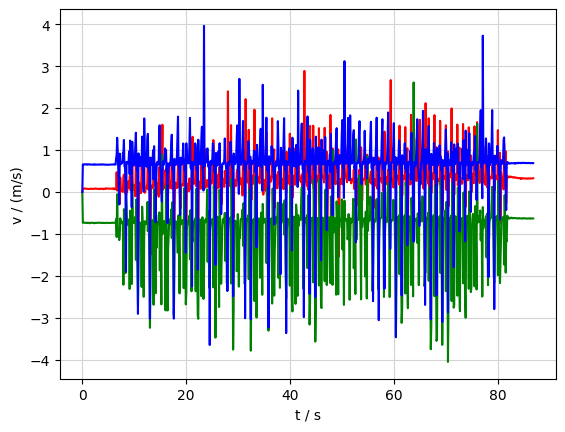

In [11]:
x_velocity = [0] * len(x_acceleration)
y_velocity = [0] * len(x_acceleration)
z_velocity = [0] * len(x_acceleration)

i = 1
while i<len(x_acceleration):
    x_velocity[i] = x_acceleration[i] * (s_normalized[i]-s_normalized[i-1])
    y_velocity[i] = y_acceleration[i] * (s_normalized[i]-s_normalized[i-1])
    z_velocity[i] = z_acceleration[i] * (s_normalized[i]-s_normalized[i-1])
    i+=1 

plt.plot(s_normalized, x_velocity, 'r')
plt.plot(s_normalized, y_velocity, 'g')
plt.plot(s_normalized, z_velocity, 'b')
plt.grid(which="major", color="lightgray", linestyle="solid")
plt.ylabel("v / (m/s)")
plt.xlabel("t / s")

Text(0.5, 0, 't / s')

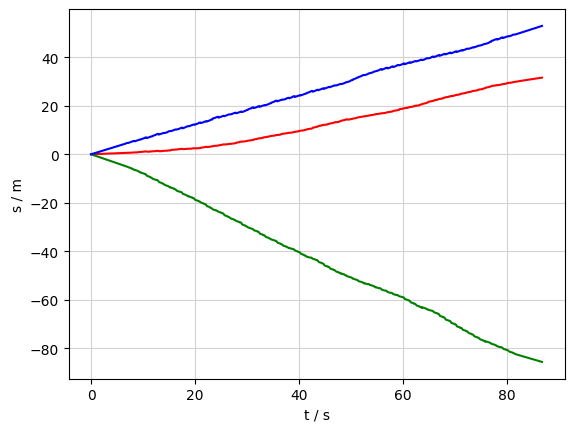

In [12]:
i = 1
x_displacement = [0] * len(x_velocity)
y_displacement = [0] * len(y_velocity)
z_displacement = [0] * len(z_velocity)

while i<len(x_velocity):
    x_displacement[i] = x_velocity[i] * (s_normalized[i]-s_normalized[i-1])
    y_displacement[i] = y_velocity[i] * (s_normalized[i]-s_normalized[i-1])
    z_displacement[i] = z_velocity[i] * (s_normalized[i]-s_normalized[i-1])
    i+=1

x_distance = np.cumsum(x_displacement)
y_distance = np.cumsum(y_displacement)
z_distance = np.cumsum(z_displacement)

x_distance_t = sum(x_displacement)
y_distance_t = sum(y_displacement)
z_distance_t = sum(z_displacement)

plt.plot(s_normalized, x_distance, 'r')
plt.plot(s_normalized, y_distance, 'g')
plt.plot(s_normalized, z_distance, 'b')
plt.grid(which="major", color="lightgray", linestyle="solid")
plt.ylabel("s / m")
plt.xlabel("t / s")